In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
from transformers import CLIPProcessor, CLIPModel, LlamaTokenizer, LlamaForCausalLM


In [3]:
# Step 1: Load and preprocess the image using TorchVision

image_path = "pottery1.jpeg"
image = Image.open(image_path).convert("RGB")

# TorchVision image transformation (resize and convert to tensor)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension



In [4]:
# Step 2: load image caption llm modle from huggingface transformers.

from transformers import BlipProcessor, BlipForConditionalGeneration
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


In [5]:
# Step 3: generate and output image caption

inputs = processor(images=image, return_tensors="pt")

# Generate caption
with torch.no_grad():
    generated_ids = model.generate(**inputs)
    caption = processor.decode(generated_ids[0], skip_special_tokens=True)

print("Generated Caption:", caption)

Generated Caption: a large, brown and white vase with geometric designs


In [6]:
# Example 2: Extract image features using CLIP

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(images=image, return_tensors="pt")
with torch.no_grad():
    image_features = clip_model.get_image_features(**inputs)

print(image_features)

tensor([[-2.8988e-01,  4.4629e-01,  1.5501e-01, -6.4606e-01,  2.7989e-01,
          1.6352e-01,  4.3472e-01,  2.0598e-01, -5.3570e-04,  4.8671e-01,
         -2.1898e-01, -1.0237e-01,  2.4099e-01, -2.6753e-01,  7.7306e-02,
         -1.6333e-01,  3.4156e-01, -4.3435e-01, -2.3358e-01,  1.0925e-01,
         -2.3542e-01,  3.5304e-01,  3.0103e-01, -1.2414e-01, -1.3399e-01,
          7.3833e-02,  2.9687e-01, -3.7898e-01, -2.1220e-01, -3.0067e-01,
         -3.5341e-01, -2.3991e-02,  1.4208e-01, -1.6714e-01,  1.3485e-01,
         -2.5947e-01,  8.1247e-02, -7.9477e-02,  6.5439e-01,  7.9715e-01,
         -2.2879e-01,  1.8573e-01,  4.8350e-01, -2.3759e-01, -7.0001e-01,
         -1.6052e+00, -3.7887e-01,  1.5524e-01,  2.7813e-01,  2.5692e-01,
          6.9710e-03,  4.8047e-02,  4.3444e-02, -7.3387e-01, -1.7371e-01,
         -4.3577e-01, -2.9807e-01, -2.1902e-01,  1.9265e-01,  4.4541e-02,
          9.4299e-02, -4.8149e-01,  2.9525e-01, -2.3758e-01, -2.7681e-01,
         -1.6556e-01, -1.3645e-01, -2.

In [7]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image


In [8]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


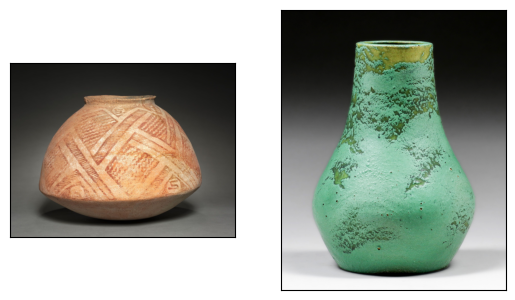

In [9]:
pottery1 = read_image('pottery1.jpeg')
pottery2 = read_image('pottery2.jpeg')
show([pottery1, pottery2])


In [10]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()


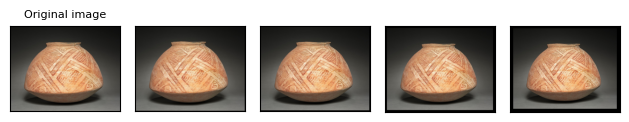

In [11]:
from PIL import Image
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('pottery1.jpeg')

padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)


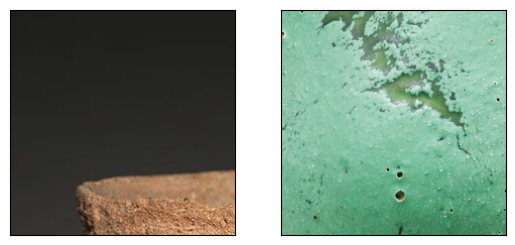

In [14]:
import torch.nn as nn

transforms = torch.nn.Sequential(
    T.RandomCrop(224),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
pottery1 = pottery1.to(device)
pottery2 = pottery2.to(device)

transformed_pottery1 = transforms(pottery1)
transformed_pottery2 = transforms(pottery2)
show([transformed_pottery1, transformed_pottery2])


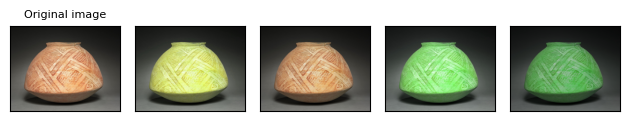

In [15]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)


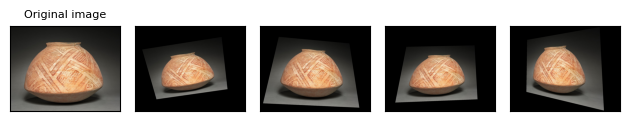

In [16]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)


In [ ]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (300, 500, 1000, orig_img.size)]
plot(center_crops)
